# Unit 5 - Financial Planning


In [1]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price

eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $85819.51
The current value of your 5.3 ETH is $11790.98


###### 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares

my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = "https://paper-api.alpaca.markets",
    api_version = "v2")

In [8]:
# Format current date as ISO format

today = pd.Timestamp('2021-03-19', tz = 'America/New_York').isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Preview DataFrame

df_shares


AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [9]:
# Pick AGG and SPY close prices

agg_close_price = float(df_shares["AGG"]["close"])
spy_close_price = float(df_shares['SPY']["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

total_crypto = (my_btc_value + my_eth_value)
total_shares = (my_spy_value + my_agg_value)

savings_data = {'Amount':[total_crypto, total_shares]}

df_savings = pd.DataFrame(savings_data, index = ['Crypto','Shares'])
df_savings

,Amount
Crypto,97610.493948
Shares,42175.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

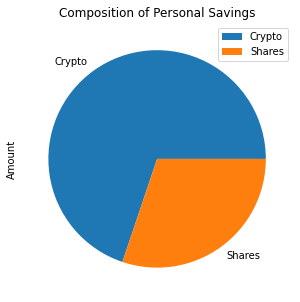

In [12]:
# Plot savings pie chart

df_savings.plot.pie(y = 'Amount', figsize = (5,5), title = "Composition of Personal Savings")


In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3



# Calculate total amount of savings

total_savings = total_crypto + total_shares
total_savings

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations Jude! You have enough money in this fund. You have a total savings of ${total_savings:0.2f}")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal, Jude")
elif emergency_fund > total_savings:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your goal")

Congratulations Jude! You have enough money in this fund. You have a total savings of $139785.49


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-03-19', tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2021-03-19', tz = "America/New_York").isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    
).df

# Display sample data

df_shares.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data

MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003574,1.008142,1.006199,1.003903,0.994602,1.000524,0.998602,0.998190,1.001833,1.004185,...,0.991952,1.001792,0.996695,0.997669,0.998187,0.999077,1.001903,1.002998,1.011061,0.996035
2,0.999930,1.001783,1.012825,1.004979,0.991109,1.017730,0.994213,1.005459,0.996174,1.006932,...,0.998677,0.994068,0.989031,0.999287,0.999276,0.998640,1.004944,1.010311,1.017764,1.000585
3,1.006625,0.997315,1.022883,1.001161,0.989794,1.018668,0.993397,1.000601,1.006346,1.003374,...,0.984971,0.992748,0.985453,1.004262,1.001459,0.998476,1.010331,1.003310,1.016456,0.996950
4,1.020419,0.995200,1.023480,1.007208,0.989583,1.016947,0.986929,1.005895,1.010530,1.007004,...,0.987923,1.003424,0.982248,1.010443,1.010730,0.994289,1.011554,1.000118,1.027069,1.000912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,154.950118,102.546801,191.836704,284.209135,183.799068,254.477790,257.284949,96.275360,564.503676,176.328149,...,76.333336,273.077348,125.164025,412.515434,122.560869,131.137919,137.109686,213.726428,101.100694,140.466257
7557,155.944930,101.583057,193.427037,283.065316,183.519117,254.243856,257.836171,96.896102,562.315391,175.867884,...,76.759845,273.693000,124.591535,412.521844,123.669887,130.530192,136.960747,212.107708,101.394185,141.341602
7558,154.145887,101.696096,196.050118,282.764925,185.245556,254.140998,258.436170,96.209139,556.951180,175.875492,...,76.535101,274.413324,124.289021,412.077723,123.930646,131.461860,136.459407,210.501956,101.471418,142.720876
7559,153.436431,101.147779,195.498449,284.625281,185.129780,252.803059,259.620041,97.038109,549.474338,175.121688,...,77.036579,272.678805,124.355716,408.781041,123.089660,132.883872,136.322507,208.162004,101.426221,142.692876


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

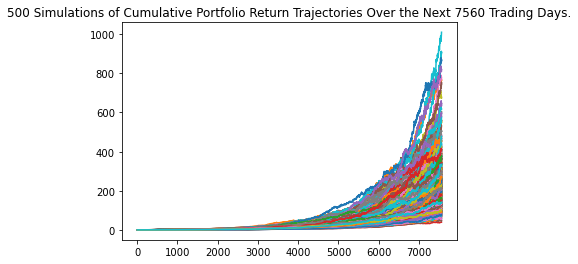

In [28]:
# Plot simulation outcomes

MC_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

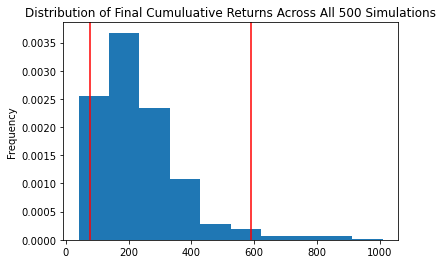

In [29]:
# Plot probability distribution and confidence intervals

MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats)

count            500.000000
mean             231.250441
std              134.811622
min               40.438588
25%              137.642594
50%              199.323170
75%              285.035175
max             1009.426116
95% CI Lower      77.417698
95% CI Upper     589.519894
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1548353.97 and $11790397.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment

initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2322530.95 and $17685596.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002048,1.004872,0.997973,0.987241,0.998778,1.000008,1.015708,1.002760,1.002831,0.999605,...,1.000541,0.982000,1.008662,0.985854,0.995961,1.014005,1.008215,0.993076,0.986220,1.009445
2,1.011173,1.015448,1.009383,0.998147,1.004274,1.008947,1.024261,0.994311,1.003027,1.009928,...,1.005119,0.995911,1.007200,0.983834,0.995989,1.005492,1.016933,0.997589,0.973349,1.023227
3,1.001594,1.023637,1.007917,1.020684,1.006366,1.008390,1.015865,0.988659,1.010245,1.007523,...,0.991898,0.998501,1.010309,0.992852,1.011072,1.019428,1.010520,1.004761,0.985050,1.014831
4,1.007269,1.031282,1.025868,1.018051,1.009739,0.997329,1.025255,0.988840,1.007045,1.016265,...,0.988225,0.991511,1.021118,0.998490,1.017035,1.019785,1.015506,1.008916,0.977314,1.011725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.200072,4.632970,5.526267,3.393440,4.822392,4.498387,2.829771,5.238910,4.584212,4.100210,...,4.546561,4.397773,4.972374,4.682919,3.010558,4.289690,3.325732,3.223714,3.904990,3.852712
1257,3.215104,4.629350,5.530984,3.411556,4.913309,4.479837,2.811224,5.259228,4.610080,4.091215,...,4.529035,4.401273,5.006806,4.645366,3.024716,4.289898,3.339271,3.239991,3.889890,3.830179
1258,3.198248,4.617941,5.491548,3.456210,4.838717,4.504240,2.787686,5.379693,4.558640,4.089217,...,4.561457,4.400747,4.967381,4.595115,3.047078,4.274287,3.336545,3.289893,3.957298,3.869665
1259,3.157772,4.595886,5.554765,3.456735,4.853579,4.526038,2.825190,5.360289,4.581946,4.090408,...,4.569028,4.465075,4.985335,4.617933,3.048376,4.321660,3.313615,3.304794,4.012353,3.843693


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

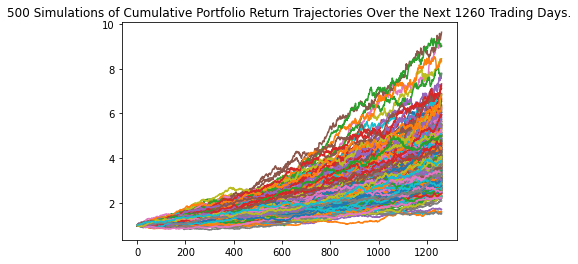

In [35]:
# Plot simulation outcomes

MC_fiveyear.plot_simulation()


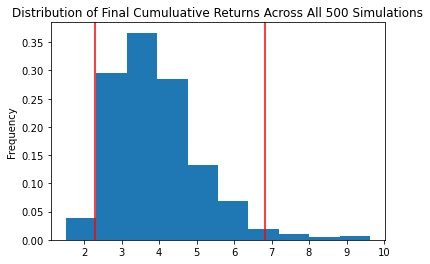

In [36]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyear.plot_distribution()


In [37]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              3.931030
std               1.196010
min               1.507098
25%               3.103543
50%               3.726991
75%               4.547059
max               9.630849
95% CI Lower      2.284624
95% CI Upper      6.824927
Name: 1260, dtype: float64


In [38]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $137077.46 and $409495.62


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.15,.85],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996806,0.988580,1.012692,1.007061,1.009524,1.002606,1.016024,1.002403,1.001833,0.996305,...,1.016902,1.002813,1.008565,1.002884,0.999281,1.008005,1.006321,0.995383,0.991884,0.994223
2,1.000881,0.981330,1.013047,1.016708,1.006386,0.991353,1.038831,1.005688,0.992692,1.003814,...,1.007024,1.005614,1.005385,1.014928,0.992584,1.005072,1.002275,1.002436,0.986660,0.990109
3,0.996067,1.001710,1.012982,1.009185,1.001309,0.991179,1.044610,1.007087,0.989947,0.993920,...,1.012019,0.997418,1.017741,1.017300,1.004257,1.010915,1.008357,0.994424,0.978292,0.992793
4,0.987980,0.988524,1.016429,1.013397,1.008691,0.988057,1.053554,1.015787,0.997983,0.999145,...,1.015825,1.002869,1.006416,1.020201,1.011312,1.003984,1.019131,0.995096,0.994681,0.993410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,16.637360,30.568593,27.395607,18.107146,9.591181,11.347431,19.991372,10.228273,7.716804,11.684551,...,13.883562,41.302837,13.855035,24.703276,9.937330,26.825448,16.967987,14.772120,19.887140,29.559993
2517,16.719177,30.817013,27.023124,18.185333,9.515055,11.306185,20.151130,10.157577,7.698949,11.599366,...,14.220867,41.233650,13.783034,24.871157,9.975499,26.792402,16.963256,15.019303,20.001947,29.745394
2518,16.928638,30.959194,26.987674,18.322642,9.610334,11.372970,20.070584,10.115929,7.639844,11.423519,...,14.113781,41.594200,13.804728,24.566839,9.945256,26.974631,17.021671,15.183916,19.749924,29.473499
2519,16.963208,30.883669,26.449291,18.473365,9.551809,11.442347,19.886756,10.030569,7.691303,11.470989,...,14.221059,41.298270,13.787078,24.773369,9.903611,26.996290,16.975609,15.155945,19.630679,29.716641


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

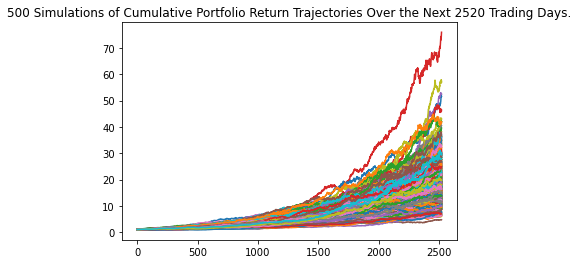

In [41]:
# Plot simulation outcomes

MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

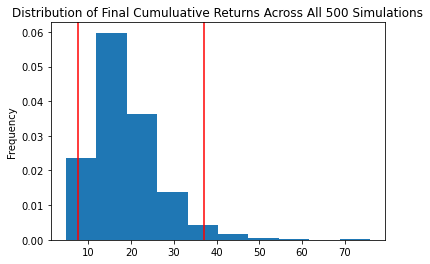

In [42]:
# Plot probability distribution and confidence intervals

MC_tenyear.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats_tbl)

count           500.000000
mean             18.660088
std               8.037074
min               4.694378
25%              13.304841
50%              17.419615
75%              22.111241
max              75.980175
95% CI Lower      7.550961
95% CI Upper     37.134087
Name: 2520, dtype: float64


In [44]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(summary_stats_tbl[8]*initial_investment,2)
ci_upper_ten = round(summary_stats_tbl[9]*initial_investment,2)


# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $453057.66 and $2228045.24
